# RR-implementation

**Goal:** B implemented my $\mathrm{\mathbb{P}}$ Db in RR, so now I'm checking it out!!

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot

import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.sys.path+= ['../RRevolution/code/','../code/',"../PyATLASstyle/"]

from postprocess import cutflowPriv

from eventDisplays import rainbow_text

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [6]:
np.arange(1,2.5,.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4])

In [2]:
f_rr = uproot.open('../../hh4b/pag-hh4b-resolved-reconstruction/sm_mc16d_pag_v3.root')
rr = f_rr['everything'].pandas.df()

In [3]:
rr.head()

run_number  event_number  pass_vbf_sel     mc_sf  trig_sf  \
entry subentry                                                              
0     0             337705       3526887         False  0.000376      1.0   
1     0             331804       3526022         False  0.000393      1.0   
2     0             338897       3526727         False -0.000375      1.0   
3     0             330203       3526456         False  0.000467      1.0   
4     0             337176       3526512         False -0.000415      1.0   

                jet_trig_sfs      truth_mhh  ntag  njets  kinematic_region  \
entry subentry                                                               
0     0                  1.0  406150.482859     3      4                 2   
1     0                  1.0  457937.985860     3      4                 0   
2     0                  1.0  541573.343525     3      4                 1   
3     0                  1.0  916477.138879     3      4                 1   
4     0                  1.0  807562.105368     6      9                 0   

                ...  tagged_vbf_j1  m_vbf_j2  E_vbf_j2  pT_vbf_j2  eta_vbf_j2  \
entry subentry  ...                                                             
0     0         ...          False       0.0       0.0        0.0         0.0   
1     0         ...          False       0.0       0.0        0.0         0.0   
2     0         ...          False       0.0       0.0        0.0         0.0   
3     0         ...          False       0.0       0.0        0.0         0.0   
4     0         ...          False       0.0       0.0        0.0         0.0   

                phi_vbf_j2  tagged_vbf_j2  vbf_mjj  vbf_dEtajj  vbf_pTvecsum  
entry subentry                                                                
0     0                0.0          False      0.0         0.0           0.0  
1     0                0.0          False      0.0         0.0           0.0  
2     0                0.0          False      0.0         0.0           0.0  
3     0                0.0          False      0.0         0.0           0.0  
4     0                0.0          False      0.0         0.0           0.0  

[5 rows x 89 columns]

In [4]:
for c in rr.columns:
    print(c)

run_number
event_number
pass_vbf_sel
mc_sf
trig_sf
jet_trig_sfs
truth_mhh
ntag
njets
kinematic_region
m_min_dj
m_max_dj
pairing_score_1
pairing_score_2
bkt_lead_jet_pt
bkt_lead_jet_tag
bkt_HT
bucket_passed
cos_theta_star
m_hh_cor
m_hh
pt_hh
dEta_hh
X_wt_tag
X_wt_notag
X_wt_nonHCWjets
trig_bucket
m_h1
E_h1
pT_h1
eta_h1
phi_h1
m_h2
E_h2
pT_h2
eta_h2
phi_h2
m_h1_j1
E_h1_j1
pT_h1_j1
eta_h1_j1
phi_h1_j1
tag_h1_j1
quantile_h1_j1
angle_h1_j1
m_h1_j2
E_h1_j2
pT_h1_j2
eta_h1_j2
phi_h1_j2
tag_h1_j2
quantile_h1_j2
angle_h1_j2
m_h2_j1
E_h2_j1
pT_h2_j1
eta_h2_j1
phi_h2_j1
tag_h2_j1
quantile_h2_j1
angle_h2_j1
m_h2_j2
E_h2_j2
pT_h2_j2
eta_h2_j2
phi_h2_j2
tag_h2_j2
quantile_h2_j2
angle_h2_j2
pT_4
pT_2
eta_i
dRjj_1
dRjj_2
m_vbf_j1
E_vbf_j1
pT_vbf_j1
eta_vbf_j1
phi_vbf_j1
tagged_vbf_j1
m_vbf_j2
E_vbf_j2
pT_vbf_j2
eta_vbf_j2
phi_vbf_j2
tagged_vbf_j2
vbf_mjj
vbf_dEtajj
vbf_pTvecsum


In [39]:
# f_vbf = uproot.open('../../hh4b/pag-hh4b-resolved-reconstruction/sm_mc16d_pag_vbfVeto.root')
# vbf = f_vbf['everything'].pandas.df()
# vbf.head()

In [79]:
me = pd.read_parquet(f'../data/SMNR_mc16d-JUN20-5jets/df_preLN_lr_0p003_Db_sort.parquet')

## Step 1:  Cutflows

In [80]:
h_rr_4b  = f_rr[b'FourTagCutflow;1']
h_rr_2b  = f_rr[b'TwoTagCutflow;1']

# h_vbf_4b = f_vbf[b'FourTagCutflow;1']
# h_vbf_2b = f_vbf[b'TwoTagCutflow;1']

vals = np.column_stack([h_rr_4b.values, h_rr_2b.values])

cutflow = pd.DataFrame(vals,index=h_rr_4b.xlabels,
                       columns=['RR 4b','RR 2b'])

In [81]:
cutflow

RR 4b         RR 2b
Initial                   33693.393550  33693.393550
Selected                  33693.393550  33693.393550
NTuple                      339.960162    339.960162
Trigger                     158.420624    158.420624
4 good jets, >= 2 tagged    126.946001    126.946001
Multi Tagged                 33.751105     31.364409
Valid                        33.751105     31.364409
Trigger Buckets              29.299155     23.928218
dEta_hh                      23.993600     17.237522
Main Xwt                     19.985662     15.621989
Signal                       10.037005      2.981415
Validation                    5.475803      2.215216
Control                       2.509378      2.086532

In [82]:
idx = ['Initial','Selected','NTuple','Trigger']

cutflow.loc[idx,'priv 4b'] = cutflow.loc[idx,'RR 4b']
cutflow.loc[idx,'priv 2b'] = cutflow.loc[idx,'RR 2b']

In [83]:
h_rr_4b.xlabels[4:]

['4 good jets, >= 2 tagged',
 'Multi Tagged',
 'Valid',
 'Trigger Buckets',
 'dEta_hh',
 'Main Xwt',
 'Signal',
 'Validation',
 'Control']

**Cool, let's run thru the cutflow for me too**

In [84]:
n_rr = 0.00945825 * 1.11354
n_me = 0.0279 * 0.3392 * 1.1129

rr / me

Db_h1_j1  Db_h1_j2  Db_h2_j1  Db_h2_j2  E_h1   E_h1_j1  \
entry  subentry                                                           
0      0              NaN       NaN       NaN       NaN   NaN       NaN   
1      0              NaN       NaN       NaN       NaN   NaN  0.538105   
2      0              NaN       NaN       NaN       NaN   NaN       NaN   
3      0              NaN       NaN       NaN       NaN   NaN  0.968588   
4      0              NaN       NaN       NaN       NaN   NaN  2.228864   
...                   ...       ...       ...       ...   ...       ...   
271395 0              NaN       NaN       NaN       NaN   NaN       NaN   
271396 0              NaN       NaN       NaN       NaN   NaN       NaN   
271397 0              NaN       NaN       NaN       NaN   NaN  3.243607   
271398 0              NaN       NaN       NaN       NaN   NaN       NaN   
271399 0              NaN       NaN       NaN       NaN   NaN       NaN   

                  E_h1_j2  E_h2    E_h2_j1   E_h2_j2  ...  w_k19  w_k2  w_k20  \
entry  subentry                                       ...                       
0      0              NaN   NaN        NaN       NaN  ...    NaN   NaN    NaN   
1      0         1.527702   NaN   1.022680  1.044595  ...    NaN   NaN    NaN   
2      0              NaN   NaN        NaN       NaN  ...    NaN   NaN    NaN   
3      0         1.977261   NaN  12.648166  0.669100  ...    NaN   NaN    NaN   
4      0         0.317193   NaN   0.591143  1.072892  ...    NaN   NaN    NaN   
...                   ...   ...        ...       ...  ...    ...   ...    ...   
271395 0              NaN   NaN        NaN       NaN  ...    NaN   NaN    NaN   
271396 0              NaN   NaN        NaN       NaN  ...    NaN   NaN    NaN   
271397 0         0.560315   NaN   3.424334  0.407828  ...    NaN   NaN    NaN   
271398 0              NaN   NaN        NaN       NaN  ...    NaN   NaN    NaN   
271399 0              NaN   NaN        NaN       NaN  ...    NaN   NaN    NaN   

                 w_k3  w_k4  w_k5  w_k6  w_k7  w_k8  w_k9  
entry  subentry                                            
0      0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1      0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2      0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3      0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4      0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...               ...   ...   ...   ...   ...   ...   ...  
271395 0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  
271396 0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  
271397 0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  
271398 0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  
271399 0          NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[271400 rows x 218 columns]

In [86]:
cutflow.loc[h_rr_4b.xlabels[4:],'priv 4b'] = cutflowPriv(me,ntag=4) * (n_rr / n_me)
cutflow.loc[h_rr_4b.xlabels[4:],'priv 2b'] = cutflowPriv(me,ntag=2) * (n_rr / n_me)

126.94587804390498
33.75107240340129
33.75107240340129
29.299126406765485
23.993576708331904
19.937695174745517
126.94587804390498
31.364378702180442
31.364378702180442
23.928195121488557
17.23750480906545
15.621515418933608


In [87]:
cutflow[['RR 4b', 'priv 4b']]

RR 4b       priv 4b
Initial                   33693.393550  33693.393550
Selected                  33693.393550  33693.393550
NTuple                      339.960162    339.960162
Trigger                     158.420624    158.420624
4 good jets, >= 2 tagged    126.946001    126.946001
Multi Tagged                 33.751105     33.751105
Valid                        33.751105     33.751105
Trigger Buckets              29.299155     29.299155
dEta_hh                      23.993600     23.993600
Main Xwt                     19.985662     19.937715
Signal                       10.037005     10.030371
Validation                    5.475803      5.463423
Control                       2.509378      2.497159

In [88]:
cutflow[['RR 2b', 'priv 2b']]

RR 2b       priv 2b
Initial                   33693.393550  33693.393550
Selected                  33693.393550  33693.393550
NTuple                      339.960162    339.960162
Trigger                     158.420624    158.420624
4 good jets, >= 2 tagged    126.946001    126.946001
Multi Tagged                 31.364409     31.364409
Valid                        31.364409     31.364409
Trigger Buckets              23.928218     23.928218
dEta_hh                      17.237522     17.237522
Main Xwt                     15.621989     15.621531
Signal                        2.981415      2.981415
Validation                    2.215216      2.215216
Control                       2.086532      2.086532

In [48]:
np.unique(rr.loc[rr.ntag ==2,'trig_bucket'],return_counts=True),np.unique(me.loc[me.ntag ==2,'bucket'],return_counts=True)

((array([0, 1, 2, 3], dtype=int8), array([ 2441, 16921,   382, 45394])),
 (array([0, 1, 2, 3, 4]), array([21035,  2441, 16921,   382, 45394])))

In [49]:
np.unique(rr.loc[rr.ntag ==4,'trig_bucket'],return_counts=True),np.unique(me.loc[me.ntag ==4,'bucket'],return_counts=True)

((array([0, 1, 2, 3], dtype=int8), array([ 2261,  3337,  1295, 65329])),
 (array([0, 1, 2, 3, 4]), array([11595,  2261,  3337,  1295, 65329])))

In [72]:
np.unique(rr.loc[rr.ntag ==3,'trig_bucket'],return_counts=True),np.unique(me.loc[(me.ntag ==3),'bucket'],return_counts=True)

((array([0, 1, 2, 3], dtype=int8), array([  4376,  16453,   1310, 109728])),
 (array([0, 1, 2, 3, 4]), array([ 31381,   4376,  16453,   1310, 109728])))

And... the buckets check out too. 
The inclusive looked a little wonky at first b/c I was 

In [51]:
# np.sum(me.loc[m_me,'mc_sf'])

In [52]:
# cutflow[[f'{c} 2b' for c in cols]]

## Step 2: m_hh 

Let's start off comparing $m_{hh}$ just after the 
1. trigger
2. 4b
3. buckets cuts

RR 74395
me 74395


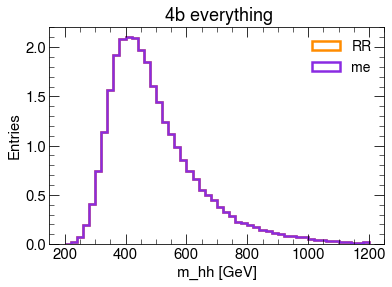

In [53]:
nb = 50
r = (200,1200)

m_rr = (rr.ntag >= 4)
m_me = (me.ntag >=4) & (me.bucket!=0)

plt.hist(rr.loc[m_rr,'m_hh'],nb,r,color='darkorange',label='RR',
         histtype='step',lw=2.5,weights=rr.loc[m_rr,'mc_sf'])

plt.hist(me.loc[m_me,'m_hh'],nb,r,color='blueviolet',label='me',
         histtype='step',lw=2.5,weights=me.loc[m_me,'mc_sf'])

print('RR',np.sum(m_rr))
print('me',np.sum(m_me))

plt.xlabel('m_hh [GeV]')
plt.ylabel('Entries')
plt.title(' 4b everything')
plt.legend()

In [54]:
prodTag = 'JUN20'
psymb = '$\mathrm{\mathbb{P}}$'

text = "$\mathbf{ATLAS}$ Simulation Internal\n"
text += f"SM mc16d {prodTag} MNT\n"
text += f"DL1r 77% WP, {psymb} Db"

RR 61852
me 61852


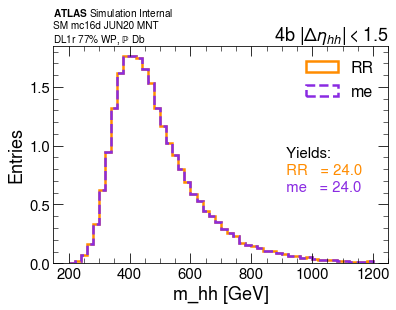

In [55]:
nb = 50
r = (200,1200)

m_rr  = ( rr.ntag >= 4) & ( abs(rr.eta_h1 -  rr.eta_h2) < 1.5)
m_me  = (me.ntag >=4) & (me.bucket!=0) & (me.abs_deta_hh < 1.5)

plt.hist(rr.loc[m_rr,'m_hh'],nb,r,color='darkorange',label='RR',
         histtype='step',lw=2.5,weights=rr.loc[m_rr,'mc_sf'])

# plt.hist(vbf.loc[m_vbf,'m_hh'],nb,r,color='mediumturquoise',label='RR vbf veto',
#          histtype='step',lw=2.5,weights=vbf.loc[m_vbf,'mc_sf'])

plt.hist(me.loc[m_me,'m_hh'],nb,r,color='blueviolet',label='me',
         histtype='step',lw=2.5,ls='--',weights=me.loc[m_me,'mc_sf'])

s_rr, s_me = np.sum(rr.loc[m_rr,'mc_sf']),np.sum(me.loc[m_me,'mc_sf'])
ls = ['Yields:',f'RR   = {s_rr:.1f}',f'me   = {s_me:.1f}']
lc = ['k','darkorange','blueviolet']

rainbow_text(900,.9,ls,lc,yoffset=1.2)

ax = plt.gca()
plt.text(0,1,text,transform=ax.transAxes,ha='left',va='bottom',fontsize=10)

plt.xlabel('m_hh [GeV]',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.title('4b $|\Delta \eta_{hh}| < 1.5$',loc='right')
plt.legend(fontsize=16)

print('RR',np.sum(m_rr))
print('me',np.sum(m_me))

Cool - since it's a perfect match w/ unweighted yields, I think this is *reasonable* although I'll also check the CR, VR, and SR *pre* X_wt too.

In [56]:
print('Events w/o the X_wt cut:\n')

# After X_wt
m_rr = (rr.ntag >= 4) & (abs(rr.eta_h1 - rr.eta_h2) < 1.5) #& (rr.X_wt_tag > 1.5)
m_me = (me.ntag >= 4) & (me.bucket!=0) & (me.abs_deta_hh < 1.5)# & (me.X_wt > 1.5)

s_rr, s_me = np.sum(m_rr),np.sum(m_me)

print(f'{"deta_hh":10s}: RR = {s_rr:5d}, priv = {s_me:5d}')

for k, region in enumerate(['Signal','Validation','Control']):
    s_rr = np.sum(m_rr & (rr.kinematic_region==k))
    s_me = np.sum(m_me & (me.kinematic_region==k))

    print(f'{region:10s}: RR = {s_rr:5.0f}, priv = {s_me:5.0f}')


Events w/o the X_wt cut:

deta_hh   : RR = 61852, priv = 61852
Signal    : RR = 29850, priv = 29850
Validation: RR = 16861, priv = 16861
Control   : RR =  8579, priv =  8579


**Sanity check the == 4b vs > 4b cases separately**

In [91]:
print('Exactly 4b events w/o the X_wt cut:\n')

# After X_wt
m_rr = (rr.ntag == 4) & (abs(rr.eta_h1 - rr.eta_h2) < 1.5) & (rr.X_wt_tag > 1.5)
m_me = (me.ntag == 4) & (me.bucket!=0) & (me.abs_deta_hh < 1.5) & (me.X_wt > 1.5)

s_rr, s_me = np.sum(m_rr),np.sum(m_me)

print(f'{"deta_hh":10s}: RR = {s_rr:5d}, priv = {s_me:5d}')

for k, region in enumerate(['Signal','Validation','Control']):
    s_rr = np.sum(m_rr & (rr.kinematic_region==k))
    s_me = np.sum(m_me & (me.kinematic_region==k))

    print(f'{region:10s}: RR = {s_rr:5.0f}, priv = {s_me:5.0f}')

Exactly 4b events w/o the X_wt cut:

deta_hh   : RR = 50645, priv = 50591
Signal    : RR = 25744, priv = 25739
Validation: RR = 13917, priv = 13901
Control   : RR =  6317, priv =  6302


Ok, since the RR has a requirement that the "b" in the top reco be a **b in the HC** and pag doesn't necessarily choose the b-tagged jets, so this is whgy

In [90]:
print('Exactly 4b events w/o the X_wt cut:\n')

# After X_wt
m_rr = (rr.ntag > 4) & (abs(rr.eta_h1 - rr.eta_h2) < 1.5) & (rr.X_wt_tag > 1.5)
m_me = (me.ntag > 4) & (me.bucket!=0) & (me.abs_deta_hh < 1.5) & (me.X_wt > 1.5)

s_rr, s_me = np.sum(m_rr),np.sum(m_me)

print(f'{"deta_hh":10s}: RR = {s_rr:5d}, priv = {s_me:5d}')

for k, region in enumerate(['Signal','Validation','Control']):
    s_rr = np.sum(m_rr & (rr.kinematic_region==k))
    s_me = np.sum(m_me & (me.kinematic_region==k))

    print(f'{region:10s}: RR = {s_rr:5.0f}, priv = {s_me:5.0f}')

Exactly 4b events w/o the X_wt cut:

deta_hh   : RR =  1270, priv =  1216
Signal    : RR =   474, priv =   465
Validation: RR =   338, priv =   328
Control   : RR =   206, priv =   188


In [57]:
np.sum(me[(me.bucket!=0)& (me.ntag!=3)].pT_h1 > me[(me.bucket!=0)& (me.ntag!=3)].pT_h2)/len(me[(me.bucket!=0) & (me.ntag != 3)])

0.8226871062759348

In [58]:
np.sum(rr[rr.ntag!=3].pT_h1 > rr[rr.ntag!=3].pT_h2)/len(rr[rr.ntag!=3])

0.8226871062759348

Ok, I'm *fairly* confident for 4b rn.

Ok - these columns are not filled, but this isn't a show stopper haha.

In [59]:
rr[['pairing_score_1','pairing_score_2']].head()

pairing_score_1  pairing_score_2
entry subentry                                  
0     0                0.971002     1.926298e-02
1     0                0.999897     5.741037e-05
2     0                0.565115     4.130025e-01
3     0                1.000000     7.849597e-09
4     0                0.740460     2.094322e-01

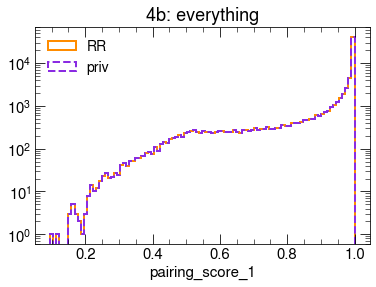

In [60]:

plt.hist(rr.loc[rr.ntag>=4,'pairing_score_1'],100,log=True,lw=2,histtype='step',
         color='darkorange',label='RR')
plt.hist(me.loc[(me.ntag>=4 )& (me.bucket!=0),'max_prob'],100,log=True,lw=2,histtype='step',
         color='blueviolet',ls='--',label='priv')

plt.legend(loc='upper left')
plt.xlabel('pairing_score_1')
plt.title('4b: everything')
plt.show()

And now for the 3 and 2 tag cases:

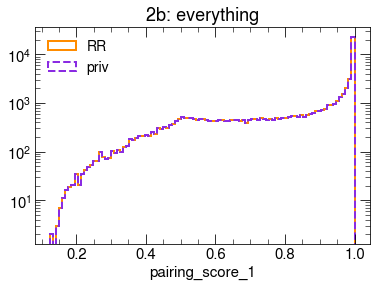

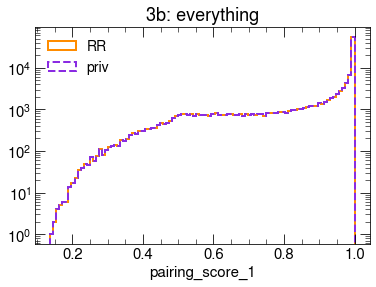

In [61]:
for ntag in [2,3]:
    plt.figure()
    plt.hist(rr.loc[rr.ntag==ntag,'pairing_score_1'],100,log=True,lw=2,histtype='step',
             color='darkorange',label='RR')
    plt.hist(me.loc[(me.ntag==ntag)& (me.bucket!=0),'max_prob'],100,log=True,lw=2,histtype='step',
             color='blueviolet',ls='--',label='priv')

    plt.legend(loc='upper left')
    plt.xlabel('pairing_score_1')
    plt.title(f'{ntag}b: everything')
plt.show()

## Also do some checks for 3b and 2b!!

Ok, so rn I *know* 3b + 1 loose is wrong, so let's start by validating 2b

RR 47822
me 47822


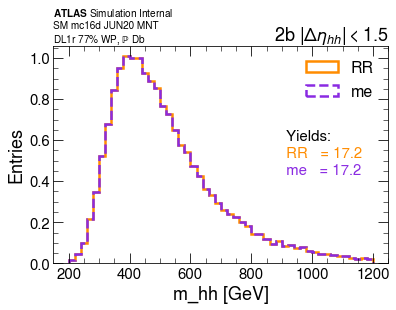

In [62]:
nb = 50
r = (200,1200)

m_rr  = ( rr.ntag == 2) & ( abs(rr.eta_h1 -  rr.eta_h2) < 1.5)
m_me  = (me.ntag ==2) & (me.bucket!=0) & (me.abs_deta_hh < 1.5)

plt.hist(rr.loc[m_rr,'m_hh'],nb,r,color='darkorange',label='RR',
         histtype='step',lw=2.5,weights=rr.loc[m_rr,'mc_sf'])

plt.hist(me.loc[m_me,'m_hh'],nb,r,color='blueviolet',label='me',
         histtype='step',lw=2.5,ls='--',weights=me.loc[m_me,'mc_sf'])

s_rr, s_me = np.sum(rr.loc[m_rr,'mc_sf']),np.sum(me.loc[m_me,'mc_sf'])
ls = ['Yields:',f'RR   = {s_rr:.1f}',f'me   = {s_me:.1f}']
lc = ['k','darkorange','blueviolet']

rainbow_text(900,.6,ls,lc,yoffset=1.2)

ax = plt.gca()
plt.text(0,1,text,transform=ax.transAxes,ha='left',va='bottom',fontsize=10)

plt.xlabel('m_hh [GeV]',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.title('2b $|\Delta \eta_{hh}| < 1.5$',loc='right')
plt.legend(fontsize=16)

print('RR',np.sum(m_rr))
print('me',np.sum(m_me))

In [63]:
print('2b events w/o the X_wt cut:\n')

# After X_wt
m_rr = (rr.ntag == 2) & (abs(rr.eta_h1 - rr.eta_h2) < 1.5) #& (rr.X_wt_tag > 1.5)
m_me = (me.ntag == 2) & (me.bucket!=0) & (me.abs_deta_hh < 1.5) #& (me.X_wt > 1.5)

s_rr, s_me = np.sum(m_rr),np.sum(m_me)

print(f'{"deta_hh":10s}: RR = {s_rr:5d}, priv = {s_me:5d}')

for k, region in enumerate(['Signal','Validation','Control']):
    s_rr = np.sum(m_rr & (rr.kinematic_region==k))
    s_me = np.sum(m_me & (me.kinematic_region==k))

    print(f'{region:10s}: RR = {s_rr:5.0f}, priv = {s_me:5.0f}')




2b events w/o the X_wt cut:

deta_hh   : RR = 47822, priv = 47822
Signal    : RR =  9423, priv =  9423
Validation: RR =  6999, priv =  6999
Control   : RR =  6774, priv =  6774


In [64]:
print('2b events w/ the X_wt cut:\n')

# After X_wt
m_rr = (rr.ntag == 2) & (abs(rr.eta_h1 - rr.eta_h2) < 1.5) & (rr.X_wt_tag > 1.5)
m_me = (me.ntag == 2) & (me.bucket!=0) & (me.abs_deta_hh < 1.5) & (me.X_wt > 1.5)

s_rr, s_me = np.sum(m_rr),np.sum(m_me)

print(f'{"deta_hh":10s}: RR = {s_rr:5d}, priv = {s_me:5d}')

for k, region in enumerate(['Signal','Validation','Control']):
    s_rr = np.sum(m_rr & (rr.kinematic_region==k))
    s_me = np.sum(m_me & (me.kinematic_region==k))

    print(f'{region:10s}: RR = {s_rr:5.0f}, priv = {s_me:5.0f}')



2b events w/ the X_wt cut:

deta_hh   : RR = 43369, priv = 43368
Signal    : RR =  8752, priv =  8752
Validation: RR =  6257, priv =  6257
Control   : RR =  5839, priv =  5839


Cool, I'm going to call this good enough for 2b.

RR 103391
me 103391


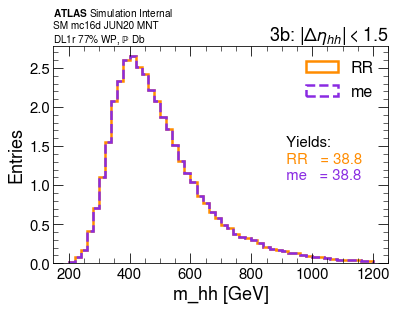

In [73]:
nb = 50
r = (200,1200)

m_rr  = ( rr.ntag == 3) & ( abs(rr.eta_h1 -  rr.eta_h2) < 1.5)
m_me  = (me.ntag ==3) & (me.bucket!=0) & (me.abs_deta_hh < 1.5)

plt.hist(rr.loc[m_rr,'m_hh'],nb,r,color='darkorange',label='RR',
         histtype='step',lw=2.5,weights=rr.loc[m_rr,'mc_sf'])

plt.hist(me.loc[m_me,'m_hh'],nb,r,color='blueviolet',label='me',
         histtype='step',lw=2.5,ls='--',weights=me.loc[m_me,'mc_sf'])

s_rr, s_me = np.sum(rr.loc[m_rr,'mc_sf']),np.sum(me.loc[m_me,'mc_sf'])
ls = ['Yields:',f'RR   = {s_rr:.1f}',f'me   = {s_me:.1f}']
lc = ['k','darkorange','blueviolet']

rainbow_text(900,1.5,ls,lc,yoffset=1.2)

ax = plt.gca()
plt.text(0,1,text,transform=ax.transAxes,ha='left',va='bottom',fontsize=10)

plt.xlabel('m_hh [GeV]',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.title('3b: $|\Delta \eta_{hh}| < 1.5$',loc='right')
plt.legend(fontsize=16)

print('RR',np.sum(m_rr))
print('me',np.sum(m_me))

## Reweighting columns

Since we've been playing with the collection of jets, sanity check that it all worked out.

In [67]:
rw_cols = ['njets','pT_4','pT_2','eta_i','dRjj_1','dRjj_2','pt_hh']

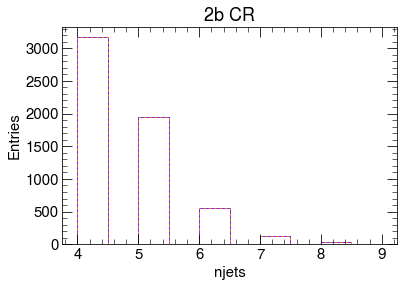

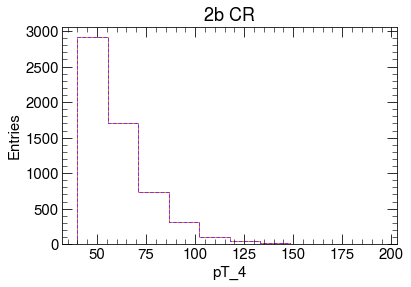

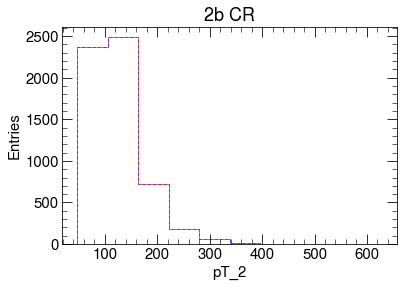

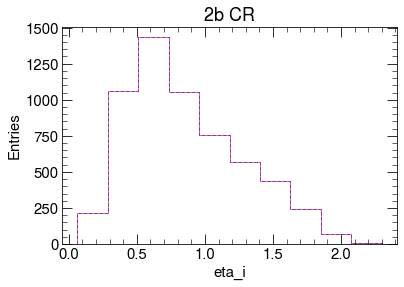

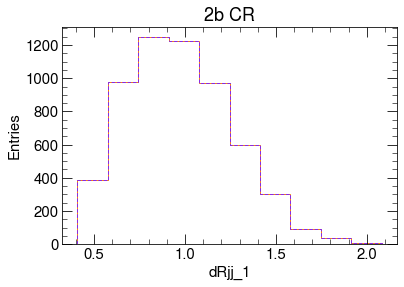

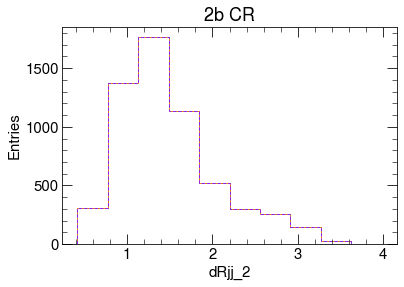

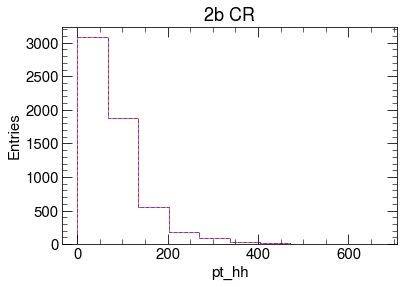

In [68]:
m_rr  = ( rr.ntag == 2) & ( abs(rr.eta_h1 -  rr.eta_h2) < 1.5) & (rr.X_wt_tag > 1.5) & (rr.kinematic_region==2)
m_me  = (me.ntag ==2) & (me.bucket!=0) & (me.abs_deta_hh < 1.5) & (me.X_wt > 1.5) & (me.kinematic_region==2)

for c in rw_cols:
    
    plt.figure()
    plt.hist(rr.loc[m_rr,c],histtype='step',color='darkorange')
    plt.hist(me.loc[m_me,c],histtype='step',color='blueviolet',ls='--')
    
    plt.xlabel(c)
    plt.ylabel('Entries')
    plt.title('2b CR')

In [69]:
rr[[f'pT_h{i}_j{j}' for i,j in product([1,2],[1,2])]].head()

pT_h1_j1    pT_h1_j2    pT_h2_j1   pT_h2_j2
entry subentry                                               
0     0         120.103455   64.863983   65.775291  65.646950
1     0         110.472778   94.030090  105.305153  72.919769
2     0         169.874939   61.184235  103.020470  54.452400
3     0         182.478775  163.404800  281.031708  49.715244
4     0         192.280334   73.117447  116.418182  91.754845

In [70]:
np.sum(np.sum(rr[[f'pT_h1_j{j}' for j in [1,2]]],axis=1) > np.sum(rr[[f'pT_h2_j{j}' for j in [1,2]]],axis=1))

271400

In [71]:
len(rr)

271400